In [155]:
import torch as tc
from torch import optim, nn 
from torch.utils.data import DataLoader, TensorDataset, random_split 

from torchmetrics import Accuracy

import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from tqdm import tqdm 

In [156]:
data = pd.read_csv('/home/ahmadrezabaqerzadeh/datasets/weekly-a-p/data.csv').iloc[0:40000]

In [157]:
data.shape

(40000, 56)

In [158]:
data.isnull().sum()

ticker         0
date           0
fwd_returns    0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
42             0
43             0
44             0
45             0
46             0
47             0
48             0
49             0
50             0
51             0
52             0
label          0
dtype: int64

In [159]:
data.drop(['ticker', 'date'], axis = 1, inplace = True)

In [160]:
data

,fwd_returns,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,label
0,-0.005642,-0.003846,0.003413,-0.019071,-0.009660,0.008286,0.029636,-0.022817,0.005885,0.010706,...,0.002131,0.025218,0.019846,0.015005,0.021630,-0.021976,0.014586,0.053336,-0.011001,0
1,-0.010648,0.029965,0.000784,0.041012,0.009267,0.024689,0.034265,-0.034352,-0.002313,-0.084328,...,-0.013430,0.009903,0.053175,-0.058573,-0.021875,0.007345,0.031162,-0.010281,-0.036922,0
2,-0.010184,0.090171,-0.052591,-0.005359,0.105501,-0.027702,-0.003553,0.004392,-0.069239,-0.084230,...,0.009283,-0.103827,0.004009,-0.019974,0.007588,-0.054290,0.038561,-0.035324,-0.007138,0
3,-0.001361,0.044034,-0.014006,-0.017882,0.013947,0.040639,0.019231,-0.018868,-0.010057,0.005780,...,0.004367,0.000000,0.010294,-0.028571,0.070336,-0.006079,0.006116,-0.010590,-0.006015,0
4,-0.008553,-0.001490,0.003888,0.010375,0.112630,-0.000448,0.099114,-0.007090,-0.001587,-0.055888,...,-0.026303,-0.015056,0.007988,-0.009856,-0.041574,-0.018823,0.030419,0.003016,-0.010358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.025394,-0.013230,-0.020016,-0.028500,0.007368,-0.062442,-0.007455,-0.013103,0.014049,-0.018455,...,-0.024192,-0.048027,-0.023723,0.028147,0.001709,0.011844,-0.002312,-0.045661,0.024295,1
39996,-0.047619,-0.060703,0.064626,-0.114458,0.044025,0.012739,-0.059880,0.077419,0.000000,0.065292,...,0.000000,-0.084270,-0.105528,-0.095455,-0.090909,0.000000,0.085202,0.179894,0.000000,0
39997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
39998,0.002283,0.032532,-0.002352,-0.028780,0.034988,-0.027435,-0.071338,0.014649,0.015311,0.013298,...,0.003326,-0.020098,0.009874,-0.008700,0.015461,0.001106,0.004442,-0.001109,0.034423,1


In [161]:
x = data.drop('label', axis = 1)
y = data['label']

In [162]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [163]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((28000, 53), (12000, 53), (28000,), (12000,))

In [164]:
xtest, xvalid, ytest, yvalid = train_test_split(xtest, ytest, test_size = 0.5, random_state = 42)

In [165]:
xtest.shape, xvalid.shape, ytest.shape, yvalid.shape

((6000, 53), (6000, 53), (6000,), (6000,))

In [166]:
xtrain = tc.FloatTensor(np.array(xtrain))
ytrain = tc.FloatTensor(np.array(ytrain))

xtest = tc.FloatTensor(np.array(xtest))
ytest = tc.FloatTensor(np.array(ytest))

xvalid = tc.FloatTensor(np.array(xvalid))
yvalid = tc.FloatTensor(np.array(yvalid))

In [81]:
mean = xtrain.mean(dim = 0)
std = xtrain.std(dim = 0)

In [168]:
xtrain = (xtrain - mean)/std 
xtest = (xtest - mean)/std 
xvalid = (xvalid - mean)/std

In [83]:
train_dataset = TensorDataset(xtrain, ytrain)
valid_dataset = TensorDataset(xvalid, yvalid)

In [84]:
train_loader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = 512, shuffle = False)


In [85]:
class RNNModel(nn.Module):
    
    def __init__(self, RNN, input_size, hidden_size, layer, bidirectional):
        super().__init__()
        
        self.rnn = RNN(input_size, hidden_size = hidden_size, num_layers = layer, bidirectional = bidirectional)
    
        self.fc = nn.LazyLinear(1)
        
    def forward(self, x):
        
        y, hidden_state = self.rnn(x)
        
        y = self.fc(y)
        
        return y

In [86]:
model = RNNModel(nn.LSTM, 53, 64, 1, False)

/home/ahmadrezabaqerzadeh/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [87]:
x, y = next(iter(train_loader))

In [88]:
model(x).shape

torch.Size([256, 1])

In [89]:
device = 'cuda' if tc.cuda.is_available() else 'cpu'

In [90]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [91]:
def train_one_epoch(model, train_loader, loss_func, optimizer, epoch):
    
    train_loss = AverageMeter()
    train_acc = Accuracy(task = 'binary').to(device)
    
    with tqdm(train_loader, unit = 'batch') as tepoch:
        
        if epoch is not None:
            tepoch.set_description(f'Epoch={epoch}')
        
        for x, y in tepoch:
            
            x = x.to(device)
            y = y.to(device)
            
            yp = model(x)
            loss = loss_func(yp.squeeze(), y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss.update(loss.item())
            train_acc(yp.squeeze(), y)
            
            tepoch.set_postfix(loss = train_loss.avg, accuracy = train_acc.compute().item() * 100)
            
    return model, train_loss.avg, train_acc.compute().item()

In [92]:
def validation(model, valid_loaedr, loss_func):
    model.eval()

    valid_loss=AverageMeter()
    valid_acc=Accuracy(task='binary').to(device)

    for x, y in valid_loaedr:

        x=x.to(device)
        y=y.to(device)

        yp=model(x)
        loss=loss_func(yp.squeeze(), y)

        valid_loss.update(loss.item())
        valid_acc(yp.squeeze(), y)

    print(f'valid loss={valid_loss.avg:.4}, accuracy={valid_acc.compute() * 100 :.4}')
    print()

    return valid_loss.avg, valid_acc.compute().item()

In [93]:
model = model.to(device)

In [94]:
optimizer = optim.Adam(model.parameters(), lr = 0.01, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [95]:
train_one_epoch(model, train_loader, loss_func, optimizer, 1)

Epoch=1: 100%|██████████| 110/110 [00:05<00:00, 21.68batch/s, accuracy=87.2, loss=0.284]


(RNNModel(
   (rnn): LSTM(53, 64)
   (fc): Linear(in_features=64, out_features=1, bias=True)
 ),
 0.28378967866301535,
 0.8720714449882507)

In [126]:
model = RNNModel(nn.RNN, 53, 128, 2, False).to(device)

/home/ahmadrezabaqerzadeh/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [127]:
optimizer = optim.Adam(model.parameters(), lr = 0.002, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [128]:
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

best_loss = tc.inf 
best_model = [0]

In [129]:
N = 25
for i in range(N):

  model, train_loss, train_acc = train_one_epoch(model, train_loader, loss_func, optimizer, i)
  valid_loss, valid_acc = validation(model,valid_loader,loss_func)

  acc_train_hist.append(train_acc)
  loss_train_hist.append(train_loss)

  acc_valid_hist.append(valid_acc)
  loss_valid_hist.append(valid_loss)

  if valid_loss<best_loss:
    best_loss = valid_loss
    best_model[0] = model
    print('model saved!')

Epoch=0: 100%|██████████| 110/110 [00:04<00:00, 24.43batch/s, accuracy=86.9, loss=0.29] 


valid loss=0.1524, accuracy=94.07

model saved!


Epoch=1: 100%|██████████| 110/110 [00:04<00:00, 25.21batch/s, accuracy=94.5, loss=0.14] 


valid loss=0.1103, accuracy=96.02

model saved!


Epoch=2: 100%|██████████| 110/110 [00:04<00:00, 26.10batch/s, accuracy=95.9, loss=0.106]


valid loss=0.1011, accuracy=95.85

model saved!


Epoch=3: 100%|██████████| 110/110 [00:04<00:00, 27.19batch/s, accuracy=96.5, loss=0.0913]


valid loss=0.0794, accuracy=97.15

model saved!


Epoch=4: 100%|██████████| 110/110 [00:03<00:00, 27.94batch/s, accuracy=97.1, loss=0.0784]


valid loss=0.1018, accuracy=96.43



Epoch=5: 100%|██████████| 110/110 [00:04<00:00, 25.80batch/s, accuracy=97.2, loss=0.0764]


valid loss=0.08666, accuracy=96.47



Epoch=6: 100%|██████████| 110/110 [00:04<00:00, 24.95batch/s, accuracy=97.7, loss=0.0651]


valid loss=0.05973, accuracy=97.92

model saved!


Epoch=7: 100%|██████████| 110/110 [00:04<00:00, 25.34batch/s, accuracy=97.6, loss=0.0656]


valid loss=0.0509, accuracy=98.02

model saved!


Epoch=8: 100%|██████████| 110/110 [00:04<00:00, 26.81batch/s, accuracy=97.9, loss=0.0564]


valid loss=0.06125, accuracy=98.02



Epoch=9: 100%|██████████| 110/110 [00:03<00:00, 29.83batch/s, accuracy=97.8, loss=0.0597]


valid loss=0.07021, accuracy=97.47



Epoch=10: 100%|██████████| 110/110 [00:03<00:00, 32.28batch/s, accuracy=98.3, loss=0.0497]


valid loss=0.05079, accuracy=98.03

model saved!


Epoch=11: 100%|██████████| 110/110 [00:03<00:00, 32.56batch/s, accuracy=98.3, loss=0.0471]


valid loss=0.1054, accuracy=95.7



Epoch=12: 100%|██████████| 110/110 [00:03<00:00, 32.13batch/s, accuracy=98.4, loss=0.0454]


valid loss=0.08027, accuracy=96.98



Epoch=13: 100%|██████████| 110/110 [00:03<00:00, 30.10batch/s, accuracy=98.4, loss=0.0449]


valid loss=0.0409, accuracy=98.38

model saved!


Epoch=14: 100%|██████████| 110/110 [00:03<00:00, 32.47batch/s, accuracy=98.7, loss=0.038] 


valid loss=0.04538, accuracy=98.35



Epoch=15: 100%|██████████| 110/110 [00:03<00:00, 33.20batch/s, accuracy=98.8, loss=0.0363]


valid loss=0.03456, accuracy=98.83

model saved!


Epoch=16: 100%|██████████| 110/110 [00:03<00:00, 33.34batch/s, accuracy=98.7, loss=0.0354]


valid loss=0.04927, accuracy=98.22



Epoch=17: 100%|██████████| 110/110 [00:03<00:00, 31.76batch/s, accuracy=98.8, loss=0.0352]


valid loss=0.03616, accuracy=98.6



Epoch=18: 100%|██████████| 110/110 [00:03<00:00, 32.59batch/s, accuracy=98.8, loss=0.0315]


valid loss=0.02884, accuracy=98.93

model saved!


Epoch=19: 100%|██████████| 110/110 [00:03<00:00, 31.79batch/s, accuracy=99, loss=0.0295] 


valid loss=0.05623, accuracy=98.03



Epoch=20: 100%|██████████| 110/110 [00:03<00:00, 31.55batch/s, accuracy=98.8, loss=0.0327]


valid loss=0.03738, accuracy=98.5



Epoch=21: 100%|██████████| 110/110 [00:03<00:00, 32.75batch/s, accuracy=99, loss=0.0289] 


valid loss=0.04007, accuracy=98.55



Epoch=22: 100%|██████████| 110/110 [00:03<00:00, 32.41batch/s, accuracy=98.8, loss=0.0322]


valid loss=0.08354, accuracy=97.07



Epoch=23: 100%|██████████| 110/110 [00:03<00:00, 33.38batch/s, accuracy=99, loss=0.0285] 


valid loss=0.03245, accuracy=98.72



Epoch=24: 100%|██████████| 110/110 [00:03<00:00, 33.11batch/s, accuracy=99, loss=0.0256]  


valid loss=0.03916, accuracy=98.47



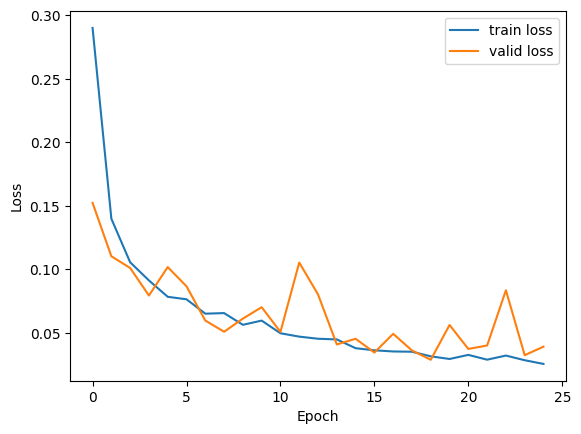

In [130]:
plt.plot(range(N), loss_train_hist, label='train loss')
plt.plot(range(N), loss_valid_hist, label='valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

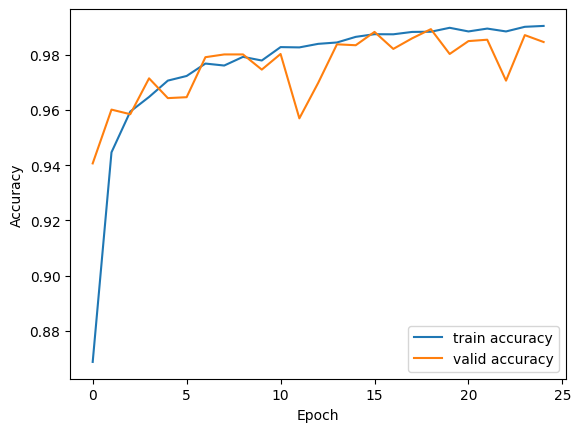

In [131]:
plt.plot(range(N), acc_train_hist, label='train accuracy')
plt.plot(range(N), acc_valid_hist, label='valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

In [132]:
model = RNNModel(nn.LSTM, 53, 128, 2, False).to(device)

In [133]:
optimizer = optim.Adam(model.parameters(), lr = 0.002, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [134]:
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

best_loss = tc.inf 
best_model1 = [0]

In [135]:
N = 25
for i in range(N):

  model, train_loss, train_acc = train_one_epoch(model, train_loader, loss_func, optimizer, i)
  valid_loss, valid_acc = validation(model,valid_loader,loss_func)

  acc_train_hist.append(train_acc)
  loss_train_hist.append(train_loss)

  acc_valid_hist.append(valid_acc)
  loss_valid_hist.append(valid_loss)

  if valid_loss<best_loss:
    best_loss = valid_loss
    best_model1[0] = model
    print('model saved!')

Epoch=0: 100%|██████████| 110/110 [00:08<00:00, 13.59batch/s, accuracy=80.9, loss=0.375]


valid loss=0.1585, accuracy=93.02

model saved!


Epoch=1: 100%|██████████| 110/110 [00:07<00:00, 13.92batch/s, accuracy=95.7, loss=0.112]


valid loss=0.09911, accuracy=96.3

model saved!


Epoch=2: 100%|██████████| 110/110 [00:09<00:00, 11.41batch/s, accuracy=96.9, loss=0.0823]


valid loss=0.09232, accuracy=96.68

model saved!


Epoch=3: 100%|██████████| 110/110 [00:10<00:00, 10.35batch/s, accuracy=97.6, loss=0.0648]


valid loss=0.1132, accuracy=96.27



Epoch=4: 100%|██████████| 110/110 [00:10<00:00, 10.51batch/s, accuracy=97.7, loss=0.0626]


valid loss=0.08815, accuracy=96.97

model saved!


Epoch=5: 100%|██████████| 110/110 [00:10<00:00, 10.05batch/s, accuracy=98, loss=0.054]  


valid loss=0.08853, accuracy=97.23



Epoch=6: 100%|██████████| 110/110 [00:08<00:00, 13.27batch/s, accuracy=98.4, loss=0.0436]


valid loss=0.07845, accuracy=97.4

model saved!


Epoch=7: 100%|██████████| 110/110 [00:08<00:00, 13.71batch/s, accuracy=98.5, loss=0.0422]


valid loss=0.07598, accuracy=97.38

model saved!


Epoch=8: 100%|██████████| 110/110 [00:08<00:00, 13.69batch/s, accuracy=98.7, loss=0.0354]


valid loss=0.08184, accuracy=97.53



Epoch=9: 100%|██████████| 110/110 [00:07<00:00, 13.98batch/s, accuracy=98.8, loss=0.0315]


valid loss=0.07472, accuracy=97.83

model saved!


Epoch=10: 100%|██████████| 110/110 [00:07<00:00, 14.14batch/s, accuracy=98.9, loss=0.0302]


valid loss=0.0694, accuracy=97.83

model saved!


Epoch=11: 100%|██████████| 110/110 [00:07<00:00, 14.04batch/s, accuracy=98.9, loss=0.0309]


valid loss=0.07165, accuracy=97.82



Epoch=12: 100%|██████████| 110/110 [00:08<00:00, 13.62batch/s, accuracy=99.1, loss=0.0246]


valid loss=0.081, accuracy=97.67



Epoch=13: 100%|██████████| 110/110 [00:08<00:00, 13.13batch/s, accuracy=99.2, loss=0.0234]


valid loss=0.07109, accuracy=97.82



Epoch=14: 100%|██████████| 110/110 [00:08<00:00, 13.11batch/s, accuracy=99.3, loss=0.0198]


valid loss=0.07788, accuracy=97.62



Epoch=15: 100%|██████████| 110/110 [00:10<00:00, 10.91batch/s, accuracy=99.3, loss=0.0199]


valid loss=0.07642, accuracy=97.88



Epoch=16: 100%|██████████| 110/110 [00:10<00:00, 10.44batch/s, accuracy=99.2, loss=0.0219]


valid loss=0.07959, accuracy=97.72



Epoch=17: 100%|██████████| 110/110 [00:10<00:00, 10.32batch/s, accuracy=99.4, loss=0.0169]


valid loss=0.08515, accuracy=97.77



Epoch=18: 100%|██████████| 110/110 [00:09<00:00, 12.18batch/s, accuracy=99.4, loss=0.0187]


valid loss=0.06436, accuracy=97.98

model saved!


Epoch=19: 100%|██████████| 110/110 [00:08<00:00, 12.64batch/s, accuracy=99.5, loss=0.0145]


valid loss=0.08383, accuracy=97.77



Epoch=20: 100%|██████████| 110/110 [00:08<00:00, 13.13batch/s, accuracy=99.5, loss=0.0136]


valid loss=0.06717, accuracy=98.18



Epoch=21: 100%|██████████| 110/110 [00:07<00:00, 13.76batch/s, accuracy=99.6, loss=0.0146]


valid loss=0.07198, accuracy=98.1



Epoch=22: 100%|██████████| 110/110 [00:08<00:00, 12.23batch/s, accuracy=99.7, loss=0.00947]


valid loss=0.0909, accuracy=97.85



Epoch=23: 100%|██████████| 110/110 [00:08<00:00, 13.74batch/s, accuracy=99.6, loss=0.0126]


valid loss=0.07946, accuracy=97.78



Epoch=24: 100%|██████████| 110/110 [00:08<00:00, 12.57batch/s, accuracy=99.6, loss=0.0111]


valid loss=0.07599, accuracy=97.97



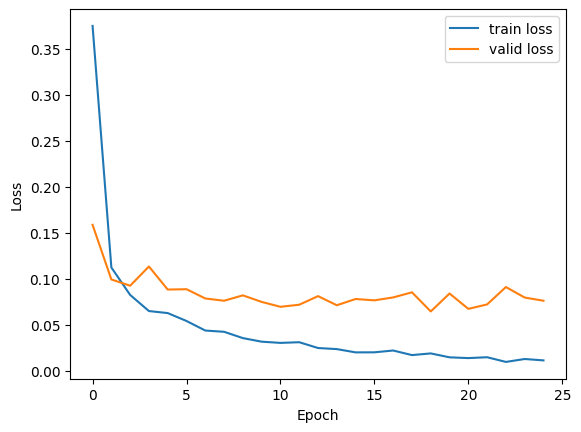

In [136]:
plt.plot(range(N), loss_train_hist, label='train loss')
plt.plot(range(N), loss_valid_hist, label='valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

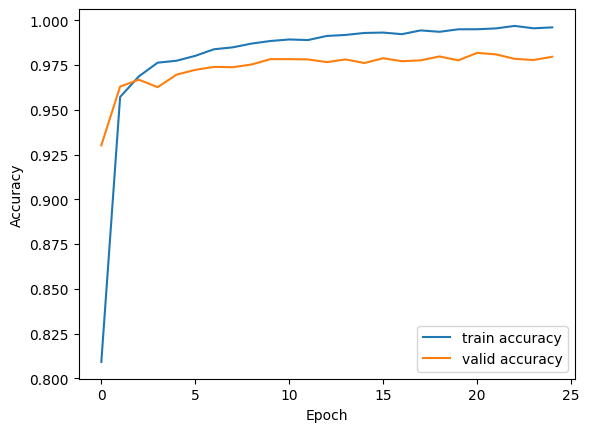

In [137]:
plt.plot(range(N), acc_train_hist, label='train accuracy')
plt.plot(range(N), acc_valid_hist, label='valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

In [138]:
model = RNNModel(nn.LSTM, 53, 128, 2, False).to(device)

In [139]:
optimizer = optim.Adam(model.parameters(), lr = 0.002, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [140]:
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

best_loss = tc.inf 
best_model2 = [0]

In [141]:
N = 25
for i in range(N):

  model, train_loss, train_acc = train_one_epoch(model, train_loader, loss_func, optimizer, i)
  valid_loss, valid_acc = validation(model,valid_loader,loss_func)

  acc_train_hist.append(train_acc)
  loss_train_hist.append(train_loss)

  acc_valid_hist.append(valid_acc)
  loss_valid_hist.append(valid_loss)

  if valid_loss<best_loss:
    best_loss = valid_loss
    best_model2[0] = model
    print('model saved!')

Epoch=0: 100%|██████████| 110/110 [00:08<00:00, 12.35batch/s, accuracy=80.3, loss=0.387]


valid loss=0.1912, accuracy=91.72

model saved!


Epoch=1: 100%|██████████| 110/110 [00:08<00:00, 12.33batch/s, accuracy=95.7, loss=0.115]


valid loss=0.1046, accuracy=96.05

model saved!


Epoch=2: 100%|██████████| 110/110 [00:09<00:00, 11.67batch/s, accuracy=97.1, loss=0.08]  


valid loss=0.08485, accuracy=97.2

model saved!


Epoch=3: 100%|██████████| 110/110 [00:10<00:00, 10.67batch/s, accuracy=97.4, loss=0.0705]


valid loss=0.08283, accuracy=97.12

model saved!


Epoch=4: 100%|██████████| 110/110 [00:10<00:00, 10.49batch/s, accuracy=97.7, loss=0.0607]


valid loss=0.08136, accuracy=97.12

model saved!


Epoch=5: 100%|██████████| 110/110 [00:10<00:00, 10.13batch/s, accuracy=98.2, loss=0.0489]


valid loss=0.08206, accuracy=97.42



Epoch=6: 100%|██████████| 110/110 [00:10<00:00, 10.34batch/s, accuracy=98.4, loss=0.0445]


valid loss=0.0802, accuracy=97.07

model saved!


Epoch=7: 100%|██████████| 110/110 [00:10<00:00, 10.50batch/s, accuracy=98.5, loss=0.0393]


valid loss=0.07216, accuracy=97.43

model saved!


Epoch=8: 100%|██████████| 110/110 [00:10<00:00, 10.33batch/s, accuracy=98.6, loss=0.04]  


valid loss=0.08997, accuracy=97.38



Epoch=9: 100%|██████████| 110/110 [00:10<00:00, 10.77batch/s, accuracy=98.8, loss=0.033] 


valid loss=0.07114, accuracy=97.6

model saved!


Epoch=10: 100%|██████████| 110/110 [00:08<00:00, 12.24batch/s, accuracy=98.9, loss=0.0303]


valid loss=0.08075, accuracy=97.18



Epoch=11: 100%|██████████| 110/110 [00:09<00:00, 11.47batch/s, accuracy=99, loss=0.0308] 


valid loss=0.06338, accuracy=97.98

model saved!


Epoch=12: 100%|██████████| 110/110 [00:10<00:00, 10.69batch/s, accuracy=99, loss=0.0271] 


valid loss=0.07388, accuracy=97.67



Epoch=13: 100%|██████████| 110/110 [00:09<00:00, 11.17batch/s, accuracy=99.2, loss=0.0206]


valid loss=0.08042, accuracy=97.93



Epoch=14: 100%|██████████| 110/110 [00:08<00:00, 13.11batch/s, accuracy=99.3, loss=0.0217]


valid loss=0.0711, accuracy=97.87



Epoch=15: 100%|██████████| 110/110 [00:08<00:00, 12.55batch/s, accuracy=99.2, loss=0.0222]


valid loss=0.07103, accuracy=97.92



Epoch=16: 100%|██████████| 110/110 [00:08<00:00, 13.19batch/s, accuracy=99.4, loss=0.0159]


valid loss=0.07987, accuracy=97.72



Epoch=17: 100%|██████████| 110/110 [00:07<00:00, 13.77batch/s, accuracy=99.4, loss=0.0181]


valid loss=0.07505, accuracy=97.68



Epoch=18: 100%|██████████| 110/110 [00:07<00:00, 14.01batch/s, accuracy=99.5, loss=0.0138]


valid loss=0.08949, accuracy=97.65



Epoch=19: 100%|██████████| 110/110 [00:07<00:00, 13.92batch/s, accuracy=99.4, loss=0.0171]


valid loss=0.06469, accuracy=98.12



Epoch=20: 100%|██████████| 110/110 [00:09<00:00, 11.72batch/s, accuracy=99.5, loss=0.0134]


valid loss=0.07454, accuracy=98.0



Epoch=21: 100%|██████████| 110/110 [00:10<00:00, 10.89batch/s, accuracy=99.6, loss=0.012] 


valid loss=0.07959, accuracy=97.98



Epoch=22: 100%|██████████| 110/110 [00:10<00:00, 10.63batch/s, accuracy=99.4, loss=0.0147]


valid loss=0.07232, accuracy=97.92



Epoch=23: 100%|██████████| 110/110 [00:10<00:00, 10.63batch/s, accuracy=99.6, loss=0.0109]


valid loss=0.09031, accuracy=97.75



Epoch=24: 100%|██████████| 110/110 [00:10<00:00, 10.75batch/s, accuracy=99.6, loss=0.0107]


valid loss=0.07925, accuracy=98.05



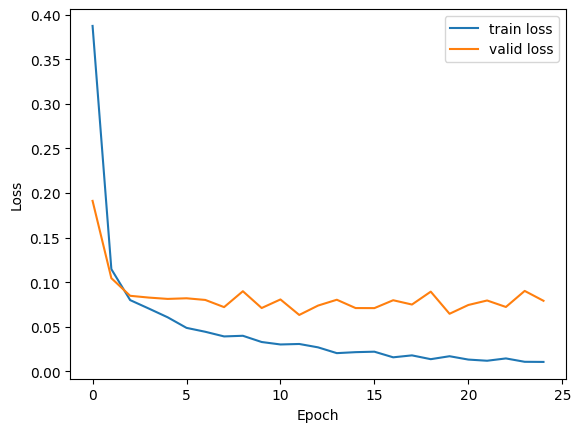

In [142]:
plt.plot(range(N), loss_train_hist, label='train loss')
plt.plot(range(N), loss_valid_hist, label='valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

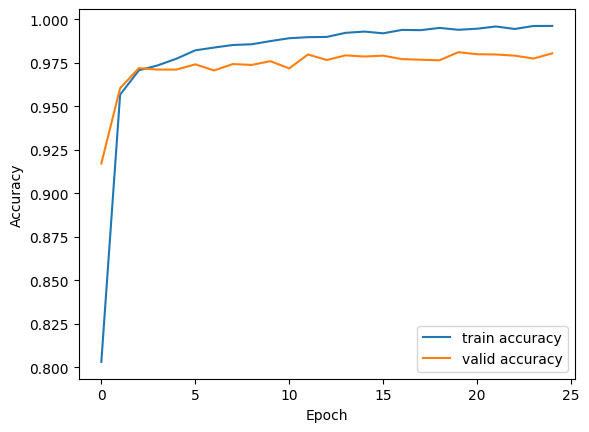

In [143]:
plt.plot(range(N), acc_train_hist, label='train accuracy')
plt.plot(range(N), acc_valid_hist, label='valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()